# Sensor Fusion ND 

## Project 2 - Camera Based 2D Feature Tracking

This notebook is used to evaluate the data created by the main c++ project and create images and tables. 

In [2]:
import collections
import json
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

from pandas.plotting import table
#%matplotlib inline

## 1. Load Data Files

In [3]:
# find files in folder and read data
print(os.getcwd())
data_file_paths = []
for path in glob.glob("evaluation/*.json"):
    data_file_paths.append(path)
    print(path)

C:\Users\chris\Documents\udacity\SensorFusionND\Project2-2D_Feature_Tracking
evaluation\eval-detector-AKAZE-AKAZE.json
evaluation\eval-detector-BRISK-BRIEF.json
evaluation\eval-detector-BRISK-BRISK.json
evaluation\eval-detector-BRISK-FREAK.json
evaluation\eval-detector-BRISK-ORB.json
evaluation\eval-detector-BRISK-SIFT.json
evaluation\eval-detector-BRISK-SURF.json
evaluation\eval-detector-HARRIS-BRIEF.json
evaluation\eval-detector-HARRIS-BRISK.json
evaluation\eval-detector-HARRIS-FREAK.json
evaluation\eval-detector-HARRIS-ORB.json
evaluation\eval-detector-HARRIS-SIFT.json
evaluation\eval-detector-HARRIS-SURF.json
evaluation\eval-detector-ORB-BRIEF.json
evaluation\eval-detector-ORB-BRISK.json
evaluation\eval-detector-ORB-FREAK.json
evaluation\eval-detector-ORB-ORB.json
evaluation\eval-detector-ORB-SIFT.json
evaluation\eval-detector-ORB-SURF.json
evaluation\eval-detector-SHITOMASI-BRIEF.json
evaluation\eval-detector-SHITOMASI-BRISK.json
evaluation\eval-detector-SHITOMASI-FREAK.json
evalu

In [4]:
# store whole data in list of dicts  
dict_list = []  
for path in data_file_paths:
    with open(path) as f:
        dict_list.append(json.load(f))

In [5]:
# create pandas DataFrame     
df = pd.DataFrame(dict_list)

In [6]:
# print example entry of the DataFrame
df.iloc[7]

detector_type                                                     HARRIS
descriptor_type                                                    BRIEF
matcher_type                                                      MAT_BF
selector_type                                                    SEL_KNN
detector_time          [0.0336864851, 0.0350628868, 0.0424440615, 0.0...
descriptor_time        [0.000597716018, 0.00198346097, 0.00215161708,...
matcher_time           [0.0, 0.000306333997, 0.000197775997, 0.001136...
descriptor_time_avg                                            0.0021428
detector_time_avg                                              0.0319551
matcher_time_avg                                             0.000834658
feature_count          [52.0, 42.0, 66.0, 61.0, 88.0, 372.0, 38.0, 13...
match_count            [0.0, 25.0, 22.0, 47.0, 33.0, 29.0, 115.0, 18....
feature_count_avg                                                  115.3
match_count_avg                                    

## 2. Plot Average Number of Keypoints in ROI

In [7]:
# get list of detectors and descriptors
det_names = []
des_names = []
for i in range(df.shape[0]):
    det = df.iloc[i]['detector_type']
    des = df.iloc[i]['descriptor_type']
    det_names.append(det)
    des_names.append(des)
    #print(det, des)
    
det_names = sorted(list(set(det_names)))
des_names = sorted(list(set(des_names)))
print("Detectors:   " ,det_names)
print("Descriptors: ", des_names)

Detectors:    ['AKAZE', 'BRISK', 'HARRIS', 'ORB', 'SHITOMASI', 'SIFT', 'SURF']
Descriptors:  ['AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'SURF']


In [8]:
det_names = sorted(list(set(df.iloc[:]["detector_type"])))
des_names = sorted(list(set(df.iloc[:]["descriptor_type"])))
print("Detectors:   " ,det_names)
print("Descriptors: ", des_names)

Detectors:    ['AKAZE', 'BRISK', 'HARRIS', 'ORB', 'SHITOMASI', 'SIFT', 'SURF']
Descriptors:  ['AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'SURF']


<IPython.core.display.Javascript object>


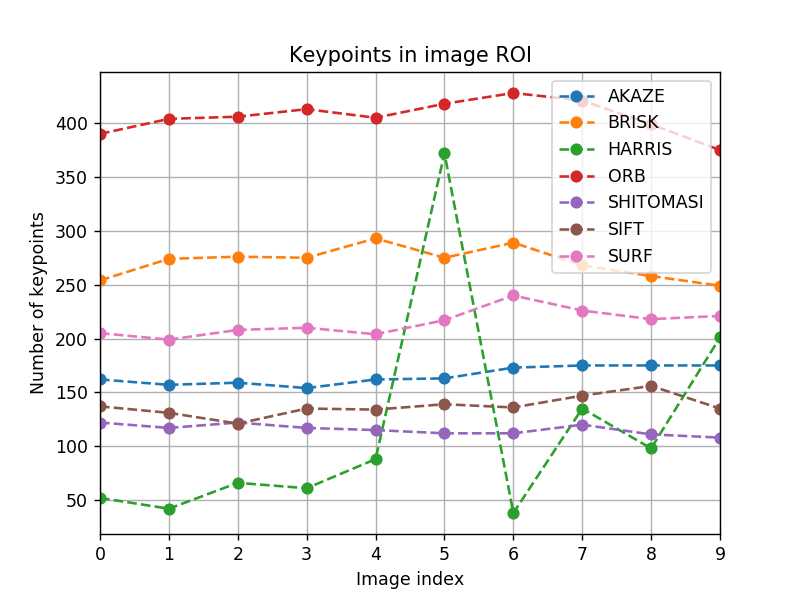

(0, 9)

In [91]:
# get average feature count for each detector
%matplotlib notebook
for name in det_names:
    #feature_count_avg.append(df[df["detector_type"] == name].iloc[0]["feature_count"])
    plt.plot(df[df["detector_type"] == name].iloc[0]["feature_count"], '--o')
    
plt.legend(det_names)
plt.grid()
plt.title('Keypoints in image ROI')
plt.xlabel('Image index')
plt.ylabel('Number of keypoints')
plt.xlim(0, 9)


## 3. Plot Feature Neighbohood Distribution

<IPython.core.display.Javascript object>


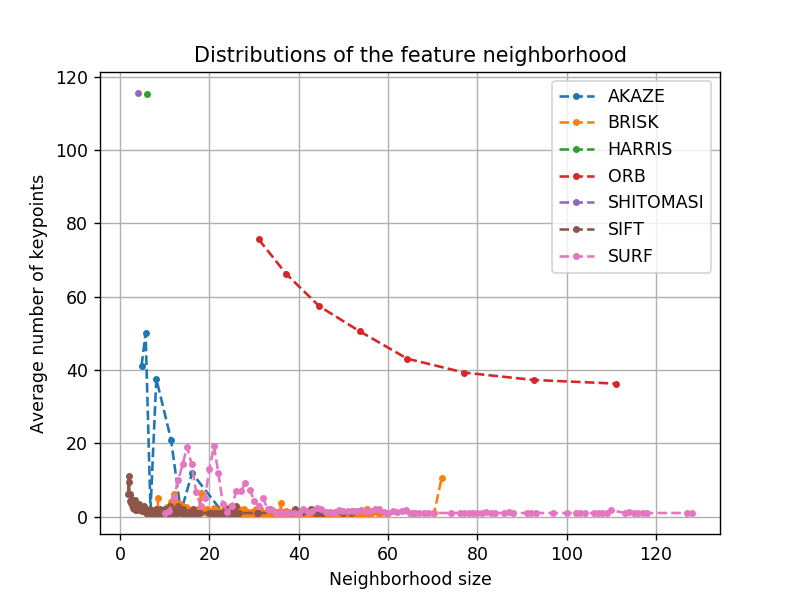

Text(0, 0.5, 'Average number of keypoints')

In [10]:
%matplotlib notebook
for name in det_names:   
    data = np.array(df[df["detector_type"] == name].iloc[0]["feature_size"][:])
    plt.plot(data[:,0], data[:,3], '--.')

plt.legend(det_names)
plt.grid()
#plt.ylim(0, 20)
plt.title('Distributions of the feature neighborhood')
plt.xlabel('Neighborhood size')
plt.ylabel('Average number of keypoints')

## 4. Processing Time Matrix

In [65]:
print("Average processing time for detection and description in ms:")
print("(rows are detectors, cols are descriptors)")
match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape
for i in range(df.shape[0]):
    det = df.iloc[i]['detector_type']
    des = df.iloc[i]['descriptor_type']
    det_time = df.iloc[i]['detector_time_avg']
    des_time = df.iloc[i]['descriptor_time_avg']
    match_matrix[det_names.index(det), des_names.index(des)] = det_time + des_time

a = pd.DataFrame(np.array(match_matrix*1000, dtype=np.int32))
a.columns = des_names
a.index = det_names
a


Average processing time for detection and description in ms:
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,272,0,0,0,0,0,0
BRISK,0,54,55,118,61,152,85
HARRIS,0,34,30,97,32,61,41
ORB,0,21,24,86,32,246,225
SHITOMASI,0,38,34,105,33,61,41
SIFT,0,225,208,487,0,523,220
SURF,0,211,208,263,204,368,240


#### Performance Ranking

In [74]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Processing Time in ms']
b.head(10)

,Detector,Descriptor,Processing Time in ms
0,ORB,BRIEF,21
1,ORB,BRISK,24
2,HARRIS,BRISK,30
3,HARRIS,ORB,32
4,ORB,ORB,32
5,SHITOMASI,ORB,33
6,HARRIS,BRIEF,34
7,SHITOMASI,BRISK,34
8,SHITOMASI,BRIEF,38
9,HARRIS,SURF,41


In [90]:
#b.tail(10)

## 5. Matrix of Feature Matches

In [82]:
print("Average number of feature matches in ROI:")
print("(rows are detectors, cols are descriptors)")
match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape
for i in range(df.shape[0]):
    det = df.iloc[i]['detector_type']
    des = df.iloc[i]['descriptor_type']
    match_matrix[det_names.index(det), des_names.index(des)] = df.iloc[i]['match_count_avg']

a = pd.DataFrame(np.array(match_matrix, dtype=np.int32))
a.columns = des_names
a.index = det_names
a

Average number of feature matches in ROI:
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,124,0,0,0,0,0,0
BRISK,0,167,154,150,148,162,142
HARRIS,0,41,37,42,39,32,41
ORB,0,180,253,145,248,257,238
SHITOMASI,0,92,75,75,89,91,49
SIFT,0,69,58,58,0,78,50
SURF,0,150,139,122,138,150,140


#### Performance Ranking

In [84]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=True)
# remove invalid elements
ranking = [item for item in ranking if item[2] != 0]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Number of Feature Matches']
b.head(10)

,Detector,Descriptor,Number of Feature Matches
0,ORB,SIFT,257
1,ORB,BRISK,253
2,ORB,ORB,248
3,ORB,SURF,238
4,ORB,BRIEF,180
5,BRISK,BRIEF,167
6,BRISK,SIFT,162
7,BRISK,BRISK,154
8,BRISK,FREAK,150
9,SURF,BRIEF,150


## 6. Matrix of  Processing Time per Feature Match

In [86]:
print("Average processing time per feature matche in ms:")
print("(rows are detectors, cols are descriptors)")
match_matrix = np.zeros((len(det_names), len(des_names)))
match_matrix.shape
for i in range(df.shape[0]):
    det = df.iloc[i]['detector_type']
    des = df.iloc[i]['descriptor_type']
    det_time = df.iloc[i]['detector_time_avg']
    des_time = df.iloc[i]['descriptor_time_avg']
    match_matrix[det_names.index(det), des_names.index(des)] = (det_time + des_time)/df.iloc[i]['match_count_avg']

a = pd.DataFrame(np.array(match_matrix*1000, dtype=np.float))
a.columns = des_names
a.index = det_names
a

Average processing time per feature matche in ms:
(rows are detectors, cols are descriptors)


,AKAZE,BRIEF,BRISK,FREAK,ORB,SIFT,SURF
AKAZE,2.184203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BRISK,0.000000,0.326277,0.360344,0.789924,0.414606,0.939362,0.597938
HARRIS,0.000000,0.819660,0.812541,2.305585,0.818365,1.907946,1.014834
ORB,0.000000,0.117097,0.096155,0.597340,0.130858,0.958012,0.948247
SHITOMASI,0.000000,0.412742,0.459311,1.397667,0.377992,0.677003,0.850632
SIFT,0.000000,3.259692,3.559108,8.309263,0.000000,6.654848,4.417975
SURF,0.000000,1.403204,1.495205,2.158887,1.477770,2.448193,1.706416


#### Performance Ranking

In [89]:
ranking = []
for row in range(a.shape[0]):
    for col in range(a.shape[1]):
        detector_name = a.index.values[row]
        descriptor_name = a.columns.values[col]
        value = a.iloc[row, col]
        ranking.append([detector_name, descriptor_name, value])
        
ranking.sort(key=lambda v:v[2], reverse=False)
# remove invalid elements
ranking = [item for item in ranking if item[2] > 1e-6]
b = pd.DataFrame(ranking)
b.columns = ['Detector', 'Descriptor', 'Processing Time per Feature Match in ms']
b.head(10)

,Detector,Descriptor,Processing Time per Feature Match in ms
0,ORB,BRISK,0.096155
1,ORB,BRIEF,0.117097
2,ORB,ORB,0.130858
3,BRISK,BRIEF,0.326277
4,BRISK,BRISK,0.360344
5,SHITOMASI,ORB,0.377992
6,SHITOMASI,BRIEF,0.412742
7,BRISK,ORB,0.414606
8,SHITOMASI,BRISK,0.459311
9,ORB,FREAK,0.597340
